**Little questions that I would have asked if we had an oral exam:**
(meaning that you shouldn't read or google or think for more than 5 seconds to answer them)

 - How do you create markdown cell in Jupyter? (with keyboard commands)
 - How do you add a cell above the current one in Jupyter (with keyboard command)?
 - What does it mean that variables are dynamically typed in python?
 - What's the difference between python and Fortran integers?
 - Explain the difference between lists, sets and tuples in python.
 - What does negative index mean when accessing list elements?
 - How do you print the first N elements of a list?
 - How do you print every Nth element of a list?
 - How do you print the reverse list?
 - Give an example of a list comprehension.
 - Give an example of cell and line magic commands in Jupyter.
 - What are keyword function arguments in python and what is their advantage?
 - Why shouldn't you do from numpy import *?
 - What is the advantage of using numpy arrays over lists? What are the dangers?
 - What's the purpose of __str__ method in a python class?
 - How do you make "+" operator work for your class?
 - What package can you use in python for symbolic calculations?



In [ ]:
import numpy as np
import math as m
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
import scipy as scp
import matplotlib.animation as animation

### **Problem1:**

Write a function that calculates the first N [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number).

In [ ]:
def Fibo(N):
  a = np.zeros((N))
  a[0] = 1
  a[1] = 1
  for i in range(2, N):
    a[i] = a[i-2] + a[i-1]
  return a
Fibo(10)

array([ 1.,  1.,  2.,  3.,  5.,  8., 13., 21., 34., 55.])

### **Problem2:**

Generate random data for 2D points coordinates. Write a function that plots them with different colors for each 90 degree section with the origin in the center. This problem should be coded as a class, i.e. you should be able to execute the code:

```
pr=Problem2()
pr.generate()
pr.display()
```

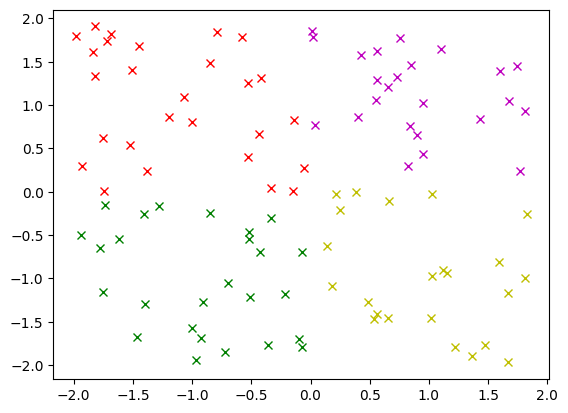

In [ ]:
class Problem2():
  def __init__(self,n):
    self.n = n
  def generate(self):
   self.l = -2 + 4*np.random.random((self.n,2))
   return self.l
  def display(self):
   for i in range(self.n):
    j = 2 if (self.l[i,0]* self.l[i,1]>=0) else 0
    j = j + 1 if (self.l[i,0]>=0) else j
    plt.plot(self.l[i,0], self.l[i,1],'x',color=['r','y','g','m'][j])
   plt.show()
pr=Problem2(100)
pr.generate()
pr.display()



### **Problem3:**

Write a decorator that calls a function twice.

In [ ]:
import time
def tw(func):
  def wrap(*arg,**kwarg):
   func(*arg,**kwarg)
   print('1')
   func(*arg,**kwarg)
   print('2')
  return wrap
@tw
def some():
  time.sleep(2)

some()

1
2


### **Problem4:**

Use sympy to solve the equation `d^2y(x)/dx^2 + 9y(x)+x=0`
Check that it's correct (still using sympy). Hint: you can access the right hand side of solution expression with `.rhs`.

Then set the constants equal to 1 and integrate the obtained function numerically using scipy over the interval [0,10]
Hint: you can use symply's lambdify function to turn sympy's expression into a function you can use later for scipy.


In [ ]:
x,C1,C2 = sp.symbols('x, C1, C2')
y = sp.Function('y')
f = sp.diff(y(x),x,x) + 9*y(x) + x
sols = sp.dsolve(sp.diff(y(x),x,x) + 9*y(x) + x,y(x))
so = sols.rhs.subs({C1: 1,C2: 1})
sp.integrate(so,(x,0,10))
scp.integrate.quad(lambda x0: so.subs(x,x0),0, 10)

(-5.60298324688237, 1.1628865760251051e-13)

### **Problem5:**
(advanced, would be given as a project to do at home and explain at the oral exam)

**Solving Laplace equation by Jacobi method**

The algorithm used in this problem solves Laplace’s equation on an evenly spaced grid through the use of a simple Jacobi iteration technique. The equation is a partial differential equation named after Pierre-Simon Laplace and are important in many fields of science: namely the fields of electromagnetism, astronomy and fluid dynamics.

The equation has the form:

```
d^2f/dx^2 + d^2f/dy^2=0
```

**The Algorithm (implement this as a class)**

 - create a numpy array to store 2 dimensional grid.

 -  Setup the initial constant boundary conditions in the following way:
     - the value at the lower left hand corner of the of the grid is 100,
     - the value ascending and to the right is set to a linear gradient reaching zero at the opposite corners (see Figure1). The rest of the borders are fixed at zero. Please note, that these boundaries remain constant throughout the simulation.

 - Setup the initial condition of the inner grid elements as 0.5.

-  Write a jacobi method. At each iteration, the value of each inner matrix element needs to be recomputed from elements of the current iteration (in a similar way to how we did with game of life). The updating formula, based on numerical computation of second derivatives, is:

```
new_field[i,j]=0.25*(field[i,j-1]+field[i,j+1]+field[i+1,j]+field[i-1,j])
```
 - Think of how to avoid using the loop to do these calculations.

![](https://github.com/VCDPhuong/ScientificPython_diploma25/blob/main/fake_exam/jacobiFigure1.jpg?raw=1)

Use `imshow` to plot the result. There is a `jacobi.gif` file uploaded that shows how the solution looks like. Making gifs in python is troublesome, so just the final picuture would be enough.

In [ ]:
class ques5():
  def __init__(self,n):
    self.n = n
  def su(self):
    self.b = np.zeros((self.n + 1,self.n + 1))
    self.b[:,0] = [100/self.n*i for i in range(self.n + 1)]
    self.b[self.n,:] = [100/self.n*(self.n - i) for i in range(self.n + 1)]
    self.b[1:self.n,1:self.n] = 0.5
    #print(self.b)
  def Ja(self):
    #print(self.b)
    m = np.zeros((self.n + 1,self.n + 1))
    m[1:self.n+1,:] = self.b[0:self.n,:]
    m[:self.n,:] += self.b[1:self.n+1,:]
    m[:,1:self.n+1] += self.b[:,0:self.n]
    m[:,:self.n] += self.b[:,1:self.n+1]
    self.b[1:self.n,1:self.n] = 0.25*m[1:self.n,1:self.n]

  def pl(self):
    fig = plt.figure()
    im = plt.imshow(self.b,interpolation='none')
    ims = []
    for i in range(1000):
     self.Ja()
     im = plt.imshow(self.b,interpolation='none')
     ims.append([im])

    print("done cals")
    ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)
    ani.save('dynamic_images.mp4')
    plt.show()
    return

a=ques5(50)
a.su()
a.pl()

done cals
